In [1]:
import pandas as pd
import numpy as np
import seaborn as sb


In [2]:
df = pd.read_csv('./Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,6.376667,3.054000,3.758667,1.198667
std,43.445368,3.244581,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.500000,3.300000,5.100000,1.800000
max,150.000000,25.800000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
def detect_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 *  IQR
    upper_bound = Q3 + 1.5 * IQR
    return [lower_bound, upper_bound]

In [6]:
def remove_outliers(data,column):
    bounds = detect_outliers(data,column)
    lower = bounds[0]
    upper = bounds[1]
    print(lower,upper)
    upper_array = np.where(data[column] >= upper)[0]
    lower_array = np.where(data[column] <= lower)[0]
    data.drop(index = upper_array, inplace = True)
    data.drop(index = lower_array, inplace = True)

In [7]:
remove_outliers(df,'SepalLengthCm')

2.999999999999999 8.600000000000001


### PetalLengthCm Histogram

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

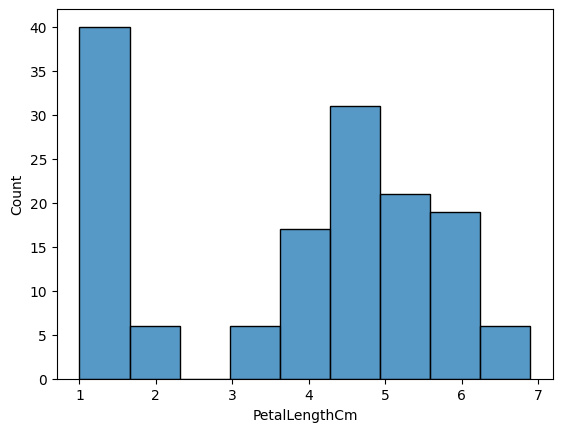

In [8]:
sb.histplot(data = df['PetalLengthCm'], kde = False)

### PetalWidth Histogram

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

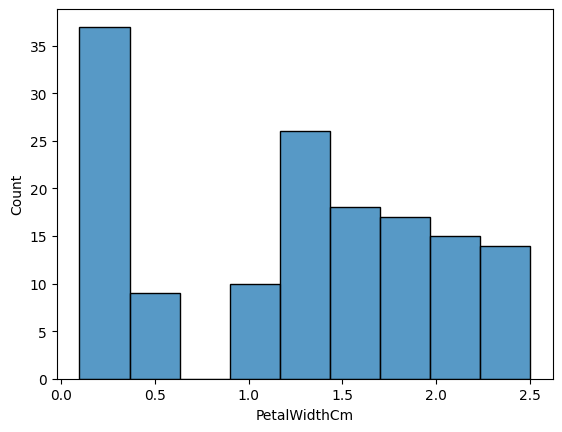

In [9]:
sb.histplot(data = df['PetalWidthCm'], kde = False)

### SepalLength Histogram

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

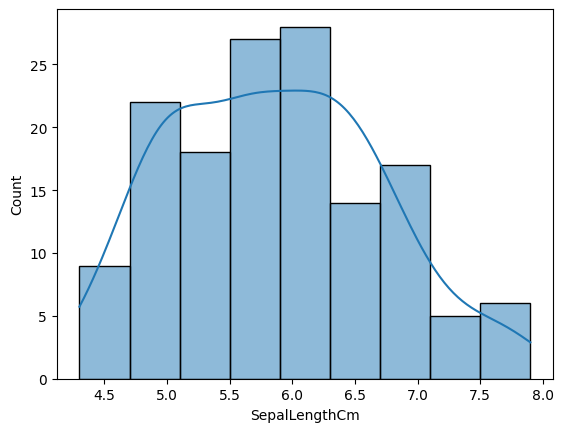

In [10]:
sb.histplot(data = df['SepalLengthCm'], kde = True)

### SepalWidth Histogram

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

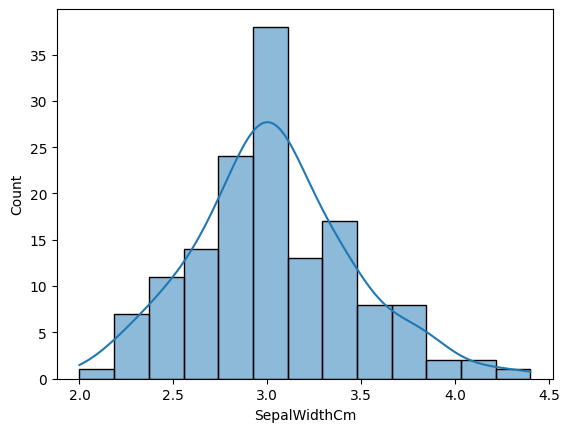

In [11]:
sb.histplot(data = df['SepalWidthCm'], kde = True)

### Boxplot of Species and SepalLengthCm

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

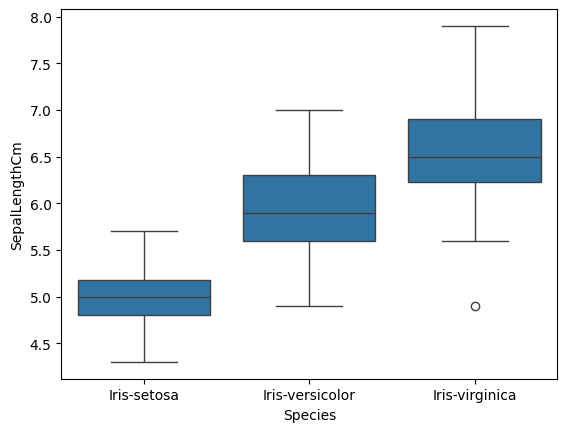

In [12]:
sb.boxplot(x = df['Species'], y = df['SepalLengthCm'])

### Boxplot of Species and SepalWidthCm

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

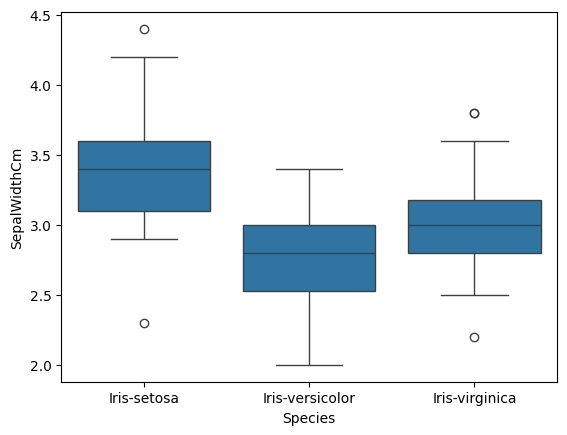

In [13]:
sb.boxplot(x = df['Species'], y = df['SepalWidthCm'])

### Boxplot of Species and PetalLengthCm

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

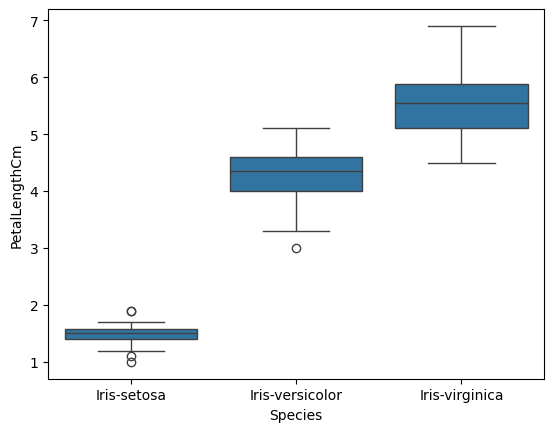

In [14]:
sb.boxplot(x = df['Species'], y = df['PetalLengthCm'])

### Boxplot of Species and PetalWidthCm

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

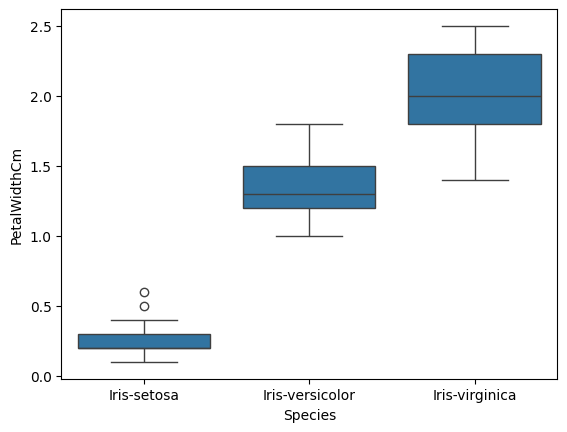

In [15]:
sb.boxplot(x = df['Species'], y = df['PetalWidthCm'])